In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Here I am guided François Chollet's deep learning with python book to complete some of the foundational machine learning problems, continuing with binary classification using the IMDB data set. I will classify movie reviews into two classes - (1) positive reviews (2) negative reviews.

***loading the IMDB dataset***

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [8]:
max([max(sequences) for sequences in train_data])

9999

***back to english?***

In [11]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [12]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

***encoding the integer sequences into a binary matrix***

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

***the model definition***

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

***compiling the model***

In [19]:
'''model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])'''

"model.compile(optimizer='rmsprop',\n              loss='binary_crossentropy',\n              metrics=['accuracy'])"

***custom optimizer, losses and metrics***

In [22]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

***set aside a validation set***

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

***training your model***

In [24]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 79ms/step - loss: 0.5270 - acc: 0.7649 - val_loss: 0.4035 - val_acc: 0.8576
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3249 - acc: 0.8940 - val_loss: 0.3388 - val_acc: 0.8667
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2480 - acc: 0.9180 - val_loss: 0.2861 - val_acc: 0.8896
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2021 - acc: 0.9332 - val_loss: 0.2916 - val_acc: 0.8840
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1651 - acc: 0.9474 - val_loss: 0.2826 - val_acc: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1443 - acc: 0.9541 - val_loss: 0.2843 - val_acc: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1244 - acc: 0.9618 - val_loss: 0.2933 - val_acc: 0.8863
Epoch 8/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1066 - a

In [25]:
history_dict = history.history

In [26]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

***plot training and validation loss***

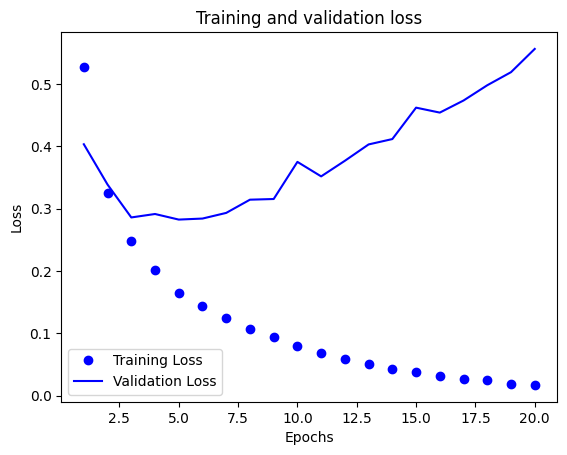

In [32]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

***plot the training and validation accuracy***

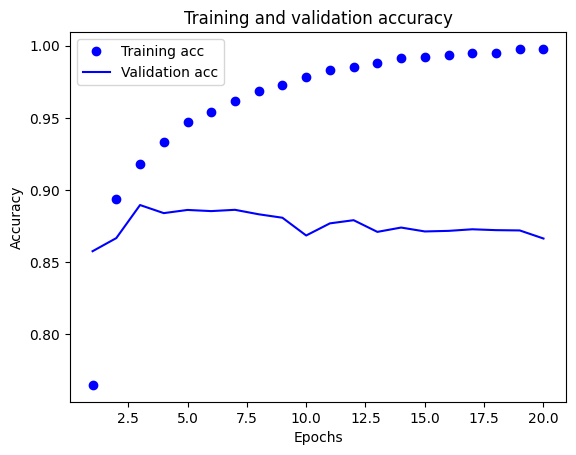

In [35]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

***retrain model from scratch***

In [37]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 21ms/step - loss: 0.4735 - accuracy: 0.8070
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2780 - accuracy: 0.9031
Epoch 3/4
49/49 [==============================] - 1s 31ms/step - loss: 0.2134 - accuracy: 0.9237
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2853 - accuracy: 0.8862


In [38]:
results

[0.2853463292121887, 0.8861600160598755]

In [39]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.21813817],
       [0.99876744],
       [0.87874144],
       ...,
       [0.12435989],
       [0.06821018],
       [0.61438304]], dtype=float32)